In [1]:
//%jsroot on

In [2]:
const int lowrun = 563;
const int highrun = 603;
const int lowrun2 = 799;
const int highrun2 = 809;
const int _strip = 16;
const int _bin = 200;
const double _minfit = 800;
const double _maxfit =1200;

In [3]:
Double_t fitGaussian(TH1F *h[16],Int_t ii) {
    // 定义高斯拟合函数
    TF1 *gaussian = new TF1("gaussian", "gaus", _minfit, _maxfit);
    h[ii]->Fit(gaussian, "RQ");

    // 获取拟合结果中的均值
    return gaussian->GetParameter(1);
}

In [4]:
TCanvas *c1=new TCanvas("c1","c1");

In [5]:
        int start = lowrun;
        int stop = highrun;
        TChain *fch;
        fch = new TChain("tree", "tele");
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtest13/tele%04d.root" , i);
          fch->AddFile(fileName.Data());
        }

        start = lowrun2;
        stop = highrun2;
        for (int i= start; i<=stop; i++){
          TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtest13/tele%04d.root" , i);
          //fch->AddFile(fileName.Data());
        }

    // 定义变量用于读取数据
    Int_t runnumber;
    UShort_t taf_ad0_xs[5];
    Double_t taf_ad0_t[5];
    Double_t xT2[10];
    Double_t gdc[2][10];
    Double_t gdc2[10];

    // 设置Branch地址
    fch->SetBranchAddress("runnumber", &runnumber);
    fch->SetBranchAddress("taf_ad0_xs[5]", taf_ad0_xs);
    fch->SetBranchAddress("taf_ad0_t[5]", taf_ad0_t);
    fch->SetBranchAddress("vT2[10]", xT2);
    fch->SetBranchAddress("gdcref[2][10]",gdc);
    fch->SetBranchAddress("gdcref2[10]",gdc2);



In [6]:
    TH1F *h[16];
    Double_t mean[16];
    Int_t ccount;
    TString find;
    ccount=0;
    for(Int_t ii=0;ii<16;ii++){
        find = TString::Format("h[%d]",ii);
        h[ii] = new TH1F(find.Data(), find.Data(), _bin, _minfit, _maxfit);
        mean[ii]=0;
    }

In [7]:
 Double_t tof;
 UShort_t st;
// 循环遍历每个事件
  TGraph *g=new TGraph();
  for (int event = 0; event < fch->GetEntries(); event++) {
            // 从TChain中获取当前事件的数据
            st=-1;
            if(event%500000==0)cout<<event<<" / "<<fch->GetEntries()<<'\n';
            fch->GetEntry(event);
            // 计算时间差
            tof = taf_ad0_t[0]-gdc2[0] - (xT2[0]-gdc[0][0]);
            st = taf_ad0_xs[0];
            // 选择特定的能量范围
            if(st>=0&&st<=15){
                ccount++;
                h[st]->Fill(tof);
            }
  }
  cout<<"out now!"<<'\n';
        for(Int_t ii=0;ii<16;ii++){
             mean[ii]= fitGaussian(h,ii);   
             g->SetPoint(ii,ii,mean[ii]);
        }

0 / 6403760
500000 / 6403760
1000000 / 6403760
1500000 / 6403760
2000000 / 6403760
2500000 / 6403760
3000000 / 6403760
3500000 / 6403760
4000000 / 6403760
4500000 / 6403760
5000000 / 6403760
5500000 / 6403760
6000000 / 6403760
out now!


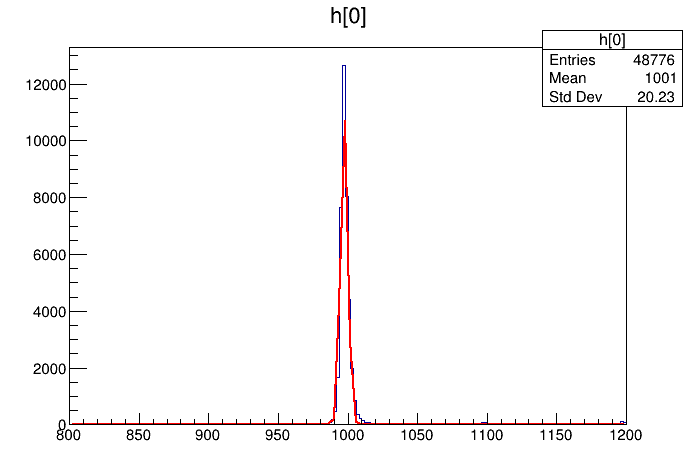

In [8]:
c1->Clear();
h[0]->Draw();
c1->Draw();

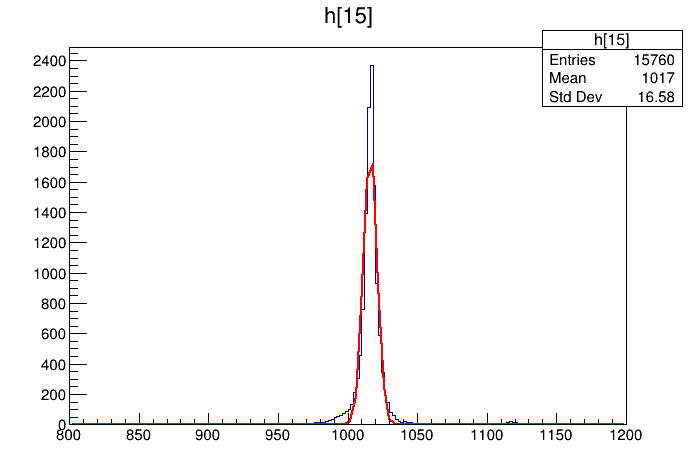

In [9]:
c1->Clear();
h[15]->Draw();
c1->Draw();

In [10]:
        for(Int_t ii=0;ii<16;ii++){
             cout<<ii<<'\t'<<mean[ii]<<'\n';  
        }
    

0	997.667
1	1004.56
2	1011.47
3	1005.96
4	1006.37
5	1012.25
6	1017.53
7	1007.59
8	1022.16
9	1002.31
10	1010.35
11	1003.61
12	1004.1
13	1015.49
14	1006.01
15	1016.35


In [11]:
        ofstream write1;
        TString fileName = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/tofdE/txt/ad0_offset_563_603.txt");
        write1.open(fileName.Data(), ios::out);
            for(Int_t ii=0;ii<16;ii++){
                 write1<<ii<<'\t'<<mean[ii]<<endl;  
            }
        write1.close();